# importing labraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os, types
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from botocore.client import Config
import ibm_boto3
%matplotlib inline

# Importing our dataset

In [2]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1AzKEyL4QrxnCnUCIjK872qOgdEI94SKGg1jTLR3MR8K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'deploymlmodelonthecloud-donotdelete-pr-568uhzq3wt8rqd'
object_key = 'stroke_prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

stroke = pd.read_csv(body)

In [3]:
#Print the first 5 rows
stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#shows all names columns
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#Display numbers of rows and columns
stroke.shape

(5110, 12)

In [6]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# check for duplicate
stroke.duplicated().sum()

0

# Data cleaning

In [9]:
stroke.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [10]:
# Show features that contain Null values 
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Lets fill null values for column bmi

In [11]:
#counts of unique values 
stroke['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [12]:
stroke['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [13]:
#Replace Null values with the mean of bmi column
stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)

In [14]:
#check null values
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
#drop id from our dataset
stroke.drop('id',axis=1,inplace=True)

In [16]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Preprocessing

#Label Encoding

In [17]:
stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [18]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [20]:
gender=encoder.fit_transform(stroke['gender'])
smoking_status=encoder.fit_transform(stroke['smoking_status'])
work_type=encoder.fit_transform(stroke['work_type'])
Residence_type=encoder.fit_transform(stroke['Residence_type'])
ever_married=encoder.fit_transform(stroke['ever_married'])

In [21]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [22]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [23]:
stroke.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [26]:
stroke['work_type']=work_type
stroke['ever_married']=ever_married
stroke['Residence_type']=Residence_type
stroke['smoking_status']=smoking_status
stroke['gender']=gender

In [29]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [30]:
sum(stroke['gender']=='Other')

0

In [31]:
indexgender=stroke[stroke['gender']=='Other'].index
stroke.drop(indexgender,inplace=True)


# visualisation

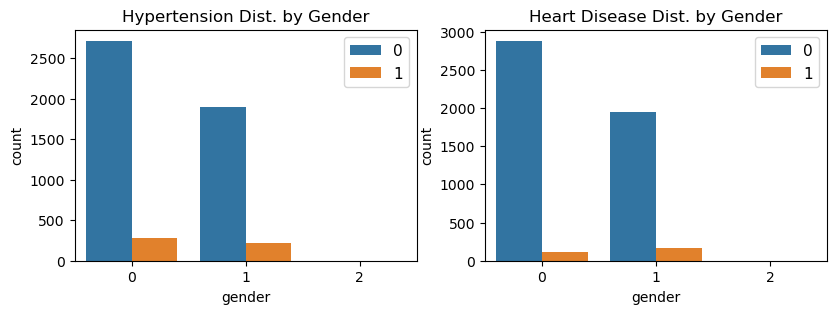

In [33]:
plt.figure(figsize=(15,3))
#-------------------------- CountPlot Side --------------------------
plt.subplot(1,3,1)
plt.title("Hypertension Dist. by Gender")
sns.countplot(x=stroke["gender"],hue="hypertension",data=stroke);
plt.legend(loc=1,prop={"size":11})

plt.subplot(1,3,2)
plt.title("Heart Disease Dist. by Gender")
sns.countplot(x=stroke["gender"],hue="heart_disease",data=stroke);
plt.legend(loc=1,prop={"size":11})

plt.show();

/tmp/wsuser/ipykernel_700/4132842593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['hypertension'] = subset['hypertension'].astype(int)


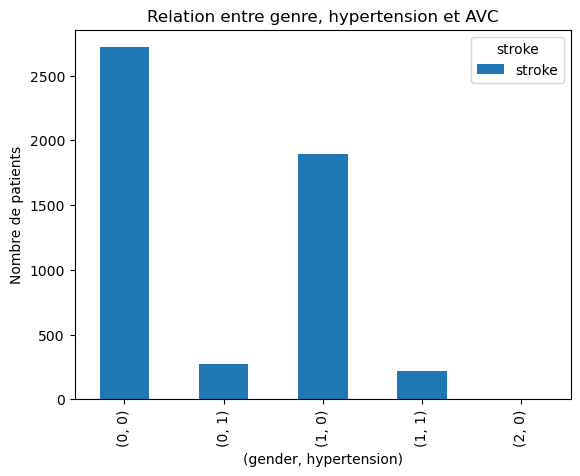

In [34]:
# Sélectionner les colonnes 'gender', 'hypertension' et 'stroke'
subset = stroke[['gender', 'hypertension', 'stroke']]

# Convertir la colonne 'hypertension' en type numérique
subset['hypertension'] = subset['hypertension'].astype(int)

# Regrouper les données par sexe et hypertension et compter le nombre de cas de stroke
pivot_table = pd.pivot_table(subset, values='stroke', index=['gender', 'hypertension'], aggfunc=len)

# Tracer le graphique en barres empilées
pivot_table.plot(kind='bar', stacked=True)

# Ajouter les étiquettes d'axes et le titre
plt.xlabel('(gender, hypertension)')
plt.ylabel('Nombre de patients')
plt.title('Relation entre genre, hypertension et AVC')

# Ajouter une légende pour les valeurs de 'stroke'
plt.legend(title='stroke', loc='upper right')

# Afficher le graphique
plt.show()

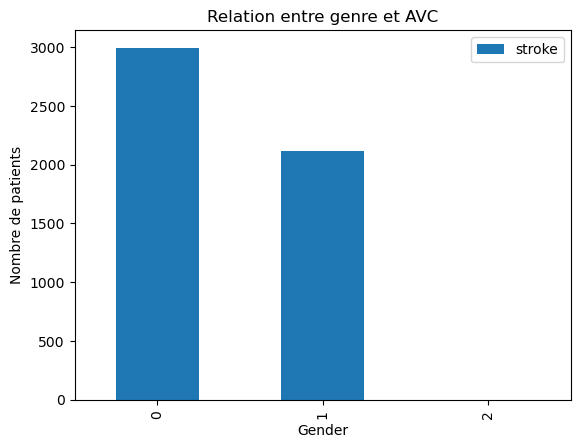

In [35]:
# Sélectionner les colonnes 'gender' et 'stroke'
subset = stroke[['gender', 'stroke']]

# Regrouper les données par sexe et compter le nombre de cas de stroke
pivot_table = pd.pivot_table(subset, values='stroke', index='gender', aggfunc=len)

# Tracer le graphique en barres
pivot_table.plot(kind='bar')

# Ajouter les étiquettes d'axes et le titre
plt.xlabel('Gender')
plt.ylabel('Nombre de patients')
plt.title('Relation entre genre et AVC')

# Afficher le graphique
plt.show()

# Data splitting 

In [36]:
X=stroke.drop("stroke",axis=1)
Y=stroke['stroke']

In [37]:
# Splitting our Dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

In [38]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3757,0,54.0,0,0,1,2,1,75.16,38.0,2
4039,1,15.0,0,0,0,4,0,74.83,17.4,0
4316,1,30.0,0,0,0,2,1,113.08,41.8,0
3650,0,66.0,0,0,1,3,0,66.24,37.5,2
1796,1,46.0,0,0,1,2,0,92.81,30.8,0


In [39]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4699,1,59.0,0,0,1,2,1,81.21,33.2,3
2669,0,53.0,0,0,0,2,1,129.43,29.6,2
3477,1,14.0,0,0,0,4,1,74.54,25.2,0
3387,0,78.0,1,0,0,3,0,198.12,29.1,2
3270,0,45.0,0,0,1,3,0,69.76,25.3,3


### Normalization

In [40]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [41]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [42]:
X_train_std

array([[-0.83907391,  0.4798842 , -0.33793499, ..., -0.68529679,
         1.17409029,  0.58520645],
       [ 1.18939099, -1.25230279, -0.33793499, ..., -0.69257809,
        -1.50248076, -1.28160896],
       [ 1.18939099, -0.58607703, -0.33793499, ...,  0.15139007,
         1.66782669, -1.28160896],
       ...,
       [-0.83907391, -0.05309641, -0.33793499, ..., -0.43949796,
        -1.15166805,  0.58520645],
       [-0.83907391, -0.71932218, -0.33793499, ..., -0.5332722 ,
        -1.03473048, -1.28160896],
       [-0.83907391,  0.5687143 , -0.33793499, ..., -0.53945027,
        -0.93078597,  0.58520645]])

# Model building

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()

In [69]:
model_dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [70]:
model_dt.feature_importances_

array([0.03518401, 0.21828833, 0.03778758, 0.01778795, 0.00610627,
       0.03320599, 0.0148549 , 0.30563769, 0.26067497, 0.0704723 ])

In [71]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [72]:
y_pred_dt=model_dt.predict(X_test_std)

In [73]:
Y_test

4699    0
2669    0
3477    0
3387    0
3270    0
       ..
3567    0
536     0
4193    0
3828    0
1077    0
Name: stroke, Length: 1022, dtype: int64

# Logistique regression

In [74]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()

In [75]:
model_lr.fit(X_train_std,Y_train)

LogisticRegression()

In [76]:
y_pred_lr=model_lr.predict(X_test_std)

# K-Nearest Neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
model_knn=KNeighborsClassifier()

In [79]:
model_knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [80]:
y_pred_knn=model_knn.predict(X_test_std)

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model_rfc=RandomForestClassifier()

In [83]:
model_rfc.fit(X_train_std,Y_train)

RandomForestClassifier()

In [84]:
y_pred_rf=model_rfc.predict(X_test_std)

# Model evaluation

In [85]:
dtc_acc=accuracy_score(Y_test,y_pred_dt)

In [86]:
lr_acc=accuracy_score(Y_test,y_pred_lr)

In [87]:
knn_acc=accuracy_score(Y_test,y_pred_knn)

In [88]:
rf_acc=accuracy_score(Y_test,y_pred_rf)

In [98]:
print(f"accuracy for decision tree: {dtc_acc*100:.3f}%")
print(f"accuracy for Logistic regression: {lr_acc*100:.3f}%")
print(f"accuracy for KNN: {knn_acc*100:.3f}%")
print(f"accuracy for Random forest: {rf_acc*100:.3f}%")

accuracy for decision tree: 90.313%
accuracy for Logistic regression: 94.716%
accuracy for KNN: 94.618%
accuracy for Random forest: 94.618%
